# Kafka exmaple

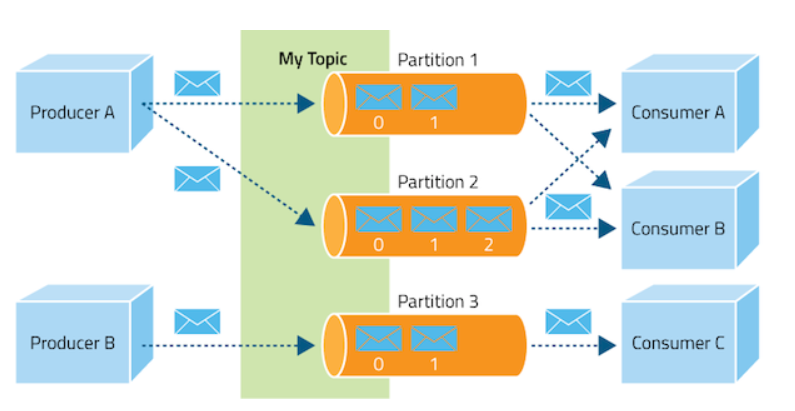

What is Kafka?

Simply put, Kafka is a distributed publish-subscribe messaging system that maintains feeds of messages in partitioned and replicated topics. In the simplest way there are three players in the Kafka ecosystem: producers, topics (run by brokers) and consumers.

Consumers read the messages of a set of partitions of a topic of their choice at their own pace. If the consumer is part of a consumer group, i.e. a group of consumers subscribed to the same topic, they can commit their offset. This can be important if you want to consume a topic in parallel with different consumers.

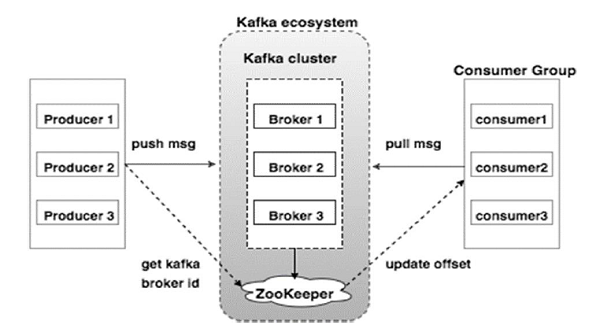
https://www.tutorialspoint.com/apache_kafka/apache_kafka_cluster_architecture.htm

Start Kafka ZooKeeper and Server before continue the code

To start kafka zookeeper and server
1. Change to dir
   cd /usr/local/kafka

2. Start Kafka Zookeeper, open new terminal
bin/zookeeper-server-start.sh config/zookeeper.properties

3. Start Kafka Server, open new terminal
bin/kafka-server-start.sh config/server.properties

How to create multiple brokers

https://www.tutorialspoint.com/apache_kafka/apache_kafka_basic_operations.htm

In [15]:
from kafka import KafkaProducer
from time import sleep
from json import dumps
import os

In [16]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                        value_serializer=lambda x: dumps(x).encode('utf-8'))

In [ ]:
# Producer send out data
for e in range(1000):
    data = {'number': e}
    producer.send('numtest', value=data) 
    sleep(5)

In [ ]:
from kafka import KafkaConsumer
from json import loads

In [ ]:
consumer = KafkaConsumer(
    'twitter',
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='earliest',
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x.decode('utf-8')))